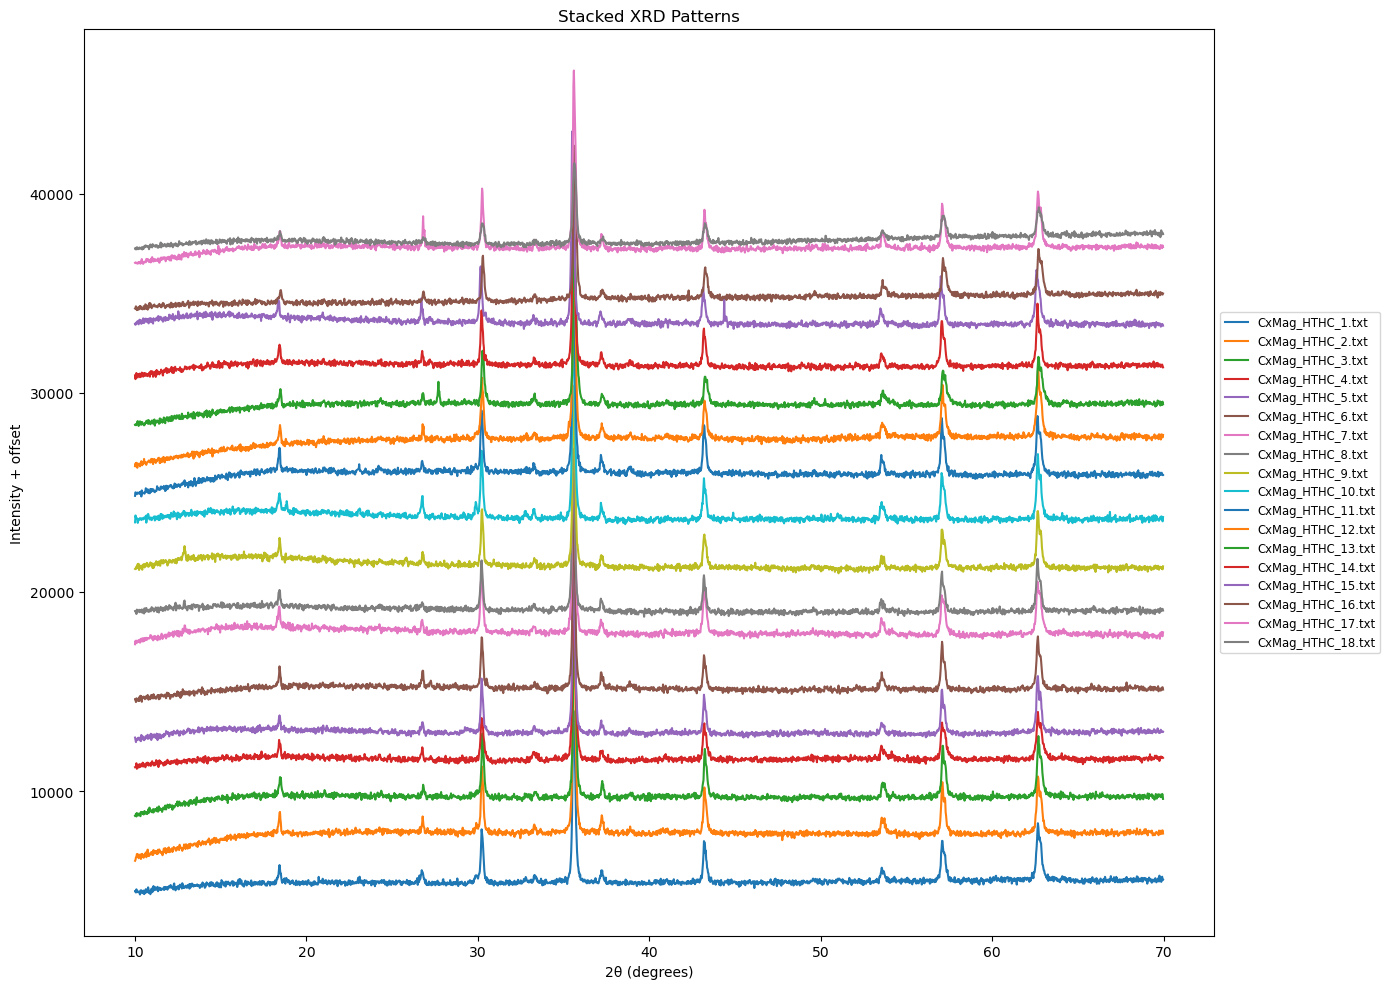

In [11]:
import re
from pathlib import Path

data_dir = Path('.')  # current folder with your txt files
files = list(data_dir.glob('*.txt'))

# Function to extract number from filename (assumes filename contains number)
def extract_number(file_path):
    match = re.search(r'\d+', file_path.stem)
    return int(match.group()) if match else -1

# Sort files based on extracted number
files.sort(key=extract_number)

plt.figure(figsize=(14, 10))
# Now plot files in correct numeric order
offset = 0
offset_step = 2000

for f in files:
    data = np.loadtxt(f)
    angle = data[:, 0]
    intensity = data[:, 1]

    plt.plot(angle, intensity + offset, label=f.name)
    offset += offset_step

plt.xlabel('2θ (degrees)')
plt.ylabel('Intensity [counts]')
plt.title('Magnetite XRD Plots (CxMag)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
plt.tight_layout()

plt.savefig('stacked_xrd_plot.png', dpi=300)
plt.show()

In [ ]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np